In [2]:
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [4]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [5]:
x_train = x_train.astype(np.float32) / 255
x_test = x_test.astype(np.float32) / 255

In [6]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=120, activation='relu'),
    keras.layers.Dense(units=84, activation='relu'),
    keras.layers.Dense(units=num_classes, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
history = model.fit(x_train, y_train,
                    batch_size=100,
                    epochs=20,
                    validation_data=(x_test, y_test),
                    shuffle=True)

Epoch 1/20
500/500 [==============================] - 2s 3ms/step - loss: 1.7628 - accuracy: 0.3614 - val_loss: 1.5523 - val_accuracy: 0.4374
Epoch 2/20
500/500 [==============================] - 1s 3ms/step - loss: 1.4715 - accuracy: 0.4699 - val_loss: 1.3989 - val_accuracy: 0.4968
Epoch 3/20
500/500 [==============================] - 1s 3ms/step - loss: 1.3640 - accuracy: 0.5107 - val_loss: 1.3372 - val_accuracy: 0.5217
Epoch 4/20
500/500 [==============================] - 1s 3ms/step - loss: 1.2915 - accuracy: 0.5389 - val_loss: 1.2922 - val_accuracy: 0.5347
Epoch 5/20
500/500 [==============================] - 1s 3ms/step - loss: 1.2449 - accuracy: 0.5567 - val_loss: 1.2508 - val_accuracy: 0.5519
Epoch 6/20
500/500 [==============================] - 1s 3ms/step - loss: 1.1932 - accuracy: 0.5776 - val_loss: 1.2527 - val_accuracy: 0.5485
Epoch 7/20
500/500 [==============================] - 1s 3ms/step - loss: 1.1530 - accuracy: 0.5901 - val_loss: 1.2082 - val_accuracy: 0.5707
Epoch 

In [9]:
def plot_history(history):
    # رسم دقت
    plt.figure(figsize=(6, 4))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy')
    plt.legend()
    plt.ylim(0.5, 1) # محدودیت محور y برای دقت
    plt.yticks(np.arange(0.5, 1.05, 0.05)) # تنظیم مقادیر محور y از 0.5 تا 1.0 با گام 0.05
    plt.grid(True)
    plt.show()

    # رسم خطا
    plt.figure(figsize=(6, 4))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Model Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

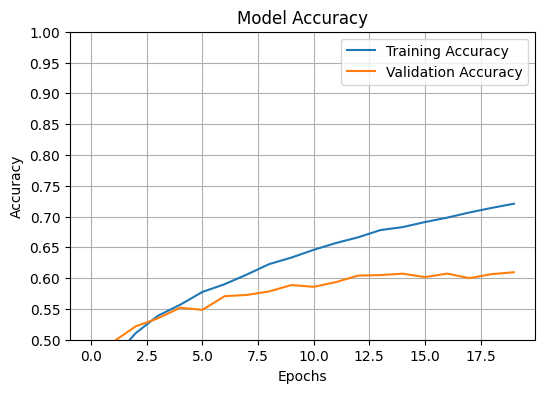

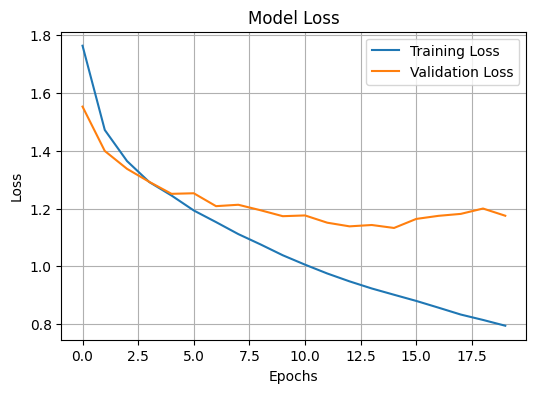

In [10]:
plot_history(history)